In [1]:
import pandas as pd 

In [2]:
diabetes = pd.read_csv('../data/diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [8]:
import tensorflow as tf


/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/it/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: P

In [10]:
num_preg = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc = tf.feature_column.numeric_column('Glucose')
dias_press = tf.feature_column.numeric_column('BloodPressure')
skin_thick = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')


In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [ ]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

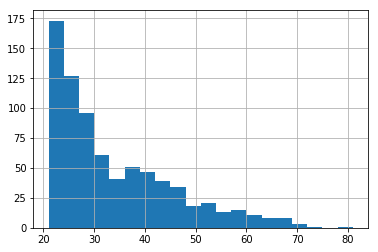

In [13]:
diabetes['Age'].hist(bins=20)

In [32]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [33]:
feat_cols = [num_preg ,plasma_gluc,dias_press,skin_thick,insulin,bmi,diabetes_pedigree,age_bucket]

In [34]:
feat_cols

[_NumericColumn(key='Pregnancies', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Glucose', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BloodPressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='SkinThickness', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='DiabetesPedigreeFunction', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _BucketizedColumn(source_column=_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))]

In [17]:
# Create a train test split


In [18]:
x_data = diabetes.drop('Outcome',axis=1)



In [19]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [22]:
labels = diabetes['Outcome']

In [23]:
labels 

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [26]:
X_train.shape

(537, 8)

In [27]:
y_train.shape

(537,)

In [28]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [35]:
model =  tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', '_service': None, '_num_ps_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc3cdad8f60>, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_task_type': 'worker', '_num_worker_replicas': 1, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_experimental_distribute': None, '_eval_distribute': None, '_protocol': None, '_is_chief': True, '_model_dir': '/tmp/tmpmo2ndhsi', '_master': '', '_device_fn': None, '_train_distribute': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
}


In [36]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpmo2ndhsi/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 91.6308
INFO:tensorflow:loss = 5.669288, step = 101 (1.127 sec)
INFO:tensorflow:global_step/sec: 100.881
INFO:tensorflow:loss = 5.514426, step = 201 (0.971 sec)
INFO:tensorflow:global_step/sec: 121.447
INFO:tensorflow:loss = 6.5827646, step = 301 (0.811 sec)
INFO:tensorflow:global_step/sec: 118.243
INFO:tensorflow:loss = 4.0560865, step = 401 (0.851 sec)
INFO:tensorflow:global_step/sec: 113.056
INFO:tensorflow:loss = 4.4317617, step = 501 (0.892 sec)
INFO:tensorflow:global_step/sec: 117.668
INFO:tensorflow:loss = 4.9376945, 

In [37]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [40]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2024-05-23-14:28:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmo2ndhsi/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2024-05-23-14:28:40
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.7998765, auc_precision_recall = 0.65131366, average_loss = 0.52695143, global_step = 1000, label/mean = 0.35064936, loss = 5.0719075, precision = 0.62666667, prediction/mean = 0.38345042, recall = 0.5802469
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpmo2ndhsi/model.ckpt-1000


In [41]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [42]:
predictions = model.predict(pred_input_func)

In [43]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmo2ndhsi/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [44]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5317131], dtype=float32),
  'logits': array([0.1270231], dtype=float32),
  'probabilities': array([0.46828684, 0.5317131 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6572227], dtype=float32),
  'logits': array([0.6509421], dtype=float32),
  'probabilities': array([0.34277722, 0.6572227 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.41951758], dtype=float32),
  'logits': array([-0.324754], dtype=float32),
  'probabilities': array([0.5804824 , 0.41951764], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.32745674], dtype=float32),
  'logits': array([-0.71971047], dtype=float32),
  'probabilities': array([0.6725433 , 0.32745677], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=obje

In [45]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', '_service': None, '_num_ps_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc3cde99e48>, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_task_type': 'worker', '_num_worker_replicas': 1, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_experimental_distribute': None, '_eval_distribute': None, '_protocol': None, '_is_chief': True, '_model_dir': '/tmp/tmpbh1abj4y', '_master': '', '_device_fn': None, '_train_distribute': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
}


In [46]:
dnn_model.train(input_fn=input_func,steps=1000)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpbh1abj4y/model.ckpt.
INFO:tensorflow:loss = 6.439008, step = 1
INFO:tensorflow:global_step/sec: 157.111
INFO:tensorflow:loss = 4.4289756, step = 101 (0.645 sec)
INFO:tensorflow:global_step/sec: 162.284
INFO:tensorflow:loss = 6.7121634, step = 201 (0.616 sec)
INFO:tensorflow:global_step/sec: 168.782
INFO:tensorflow:loss = 6.392822, step = 301 (0.588 sec)
INFO:tensorflow:global_step/sec: 165.512
INFO:tensorflow:loss = 3.9754338, step = 401 (0.609 sec)
INFO:tensorflow:global_step/sec: 147.783
INFO:tensorflow:loss = 7.516318, step = 501 (0.687 sec)
INFO:tensorflow:global_step/sec: 101.108
INFO:tensorflow:loss = 3.439516, step = 601 (1.036 sec)
INFO:tensorflow:global_step/sec: 113.659
INFO:tensorflow:loss

In [47]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [48]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2024-05-23-14:34:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbh1abj4y/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2024-05-23-14:34:38
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.8056379, auc_precision_recall = 0.68488306, average_loss = 0.5023454, global_step = 1000, label/mean = 0.35064936, loss = 4.8350744, precision = 0.65217394, prediction/mean = 0.30862287, recall = 0.5555556
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpbh1abj4y/model.ckpt-1000


{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8056379,
 'auc_precision_recall': 0.68488306,
 'average_loss': 0.5023454,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.8350744,
 'precision': 0.65217394,
 'prediction/mean': 0.30862287,
 'recall': 0.5555556}